In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('https://www.dropbox.com/s/b173516z9mye1z7/BlackFridaySalesPrediction.csv?dl=1')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [70]:
df.describe()

,User_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,2.496430,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,1.353632,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,2.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,3.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,6.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [69]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [72]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [73]:
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])

In [74]:
df['City_Category'].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [75]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [76]:
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

In [77]:
df['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [78]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [79]:
df=df.replace({"F":1,"M":0})

In [80]:
df=df.drop("Product_ID",axis=1)

In [81]:
df=df.drop("User_ID",axis=1)

In [82]:
df.isnull().sum()/df.shape[0]*100

Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

In [83]:
df=df.drop("Product_Category_2",axis=1)

In [84]:
df=df.drop("Product_Category_3",axis=1)

In [85]:
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [91]:
df['Age'] = lr.fit_transform(df['Age'])

In [92]:
df.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.246895,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9263.968713
std,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000
25%,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5823.000000
50%,0.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,8047.000000
75%,0.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,12054.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,23961.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


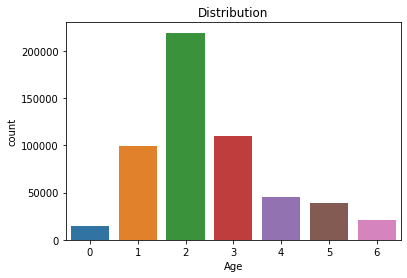

In [100]:
sns.countplot(df['Age'])
plt.title('Distribution')
plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


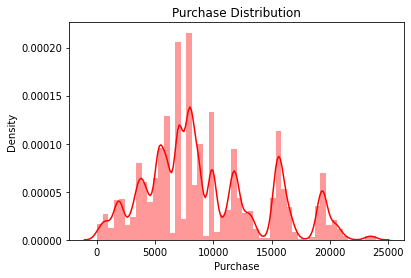

In [94]:
sns.distplot(df["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


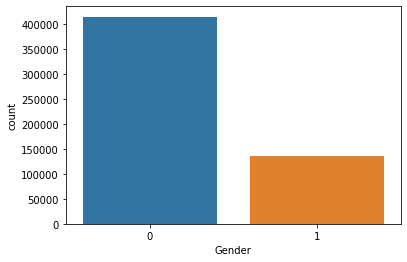

In [95]:
sns.countplot(df['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


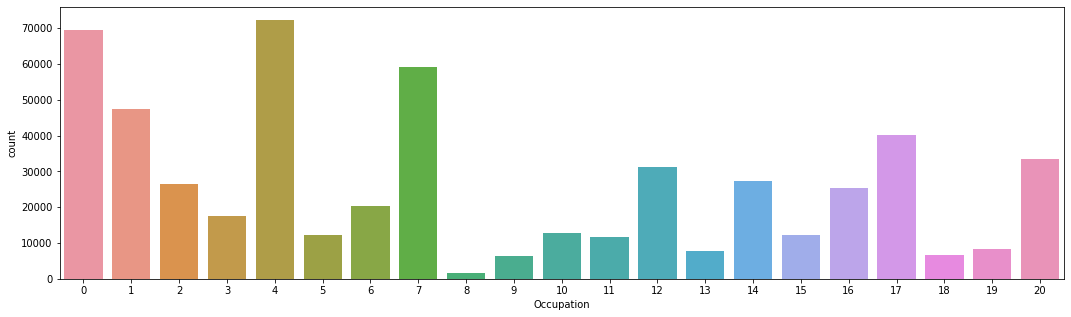

In [96]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


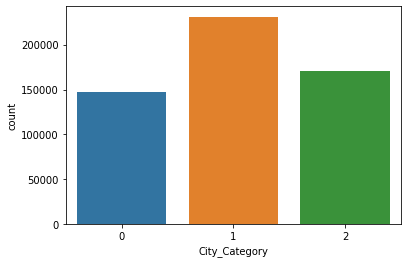

In [97]:
sns.countplot(df['City_Category'])
plt.show()

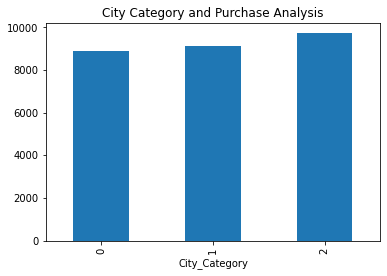

In [98]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

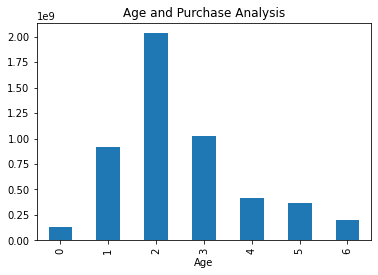

In [99]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


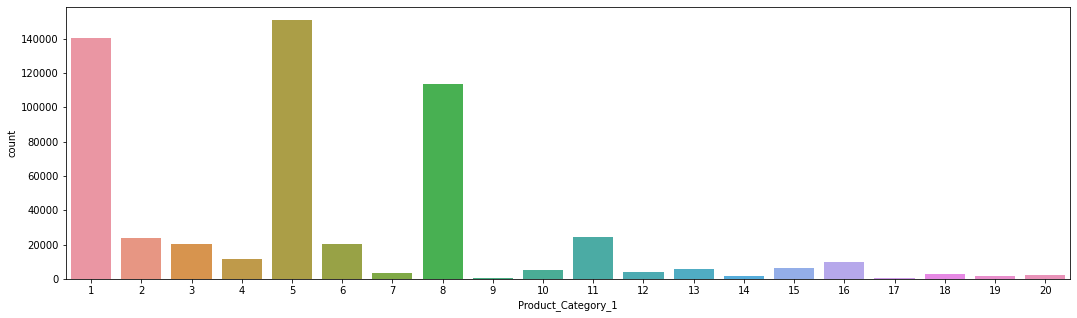

In [101]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])
plt.show()

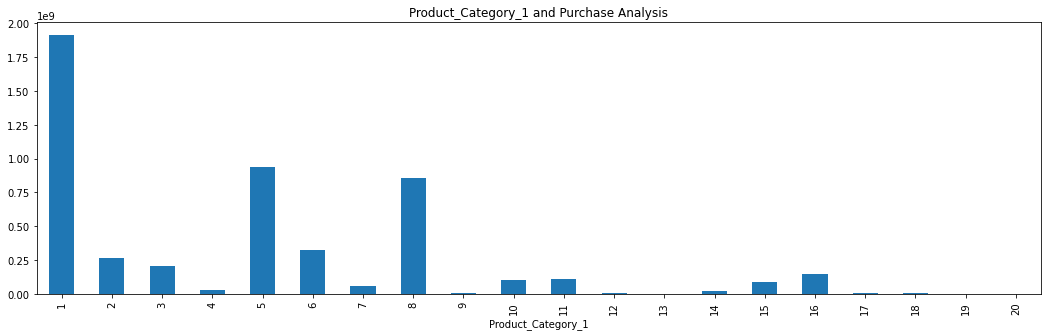

In [102]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

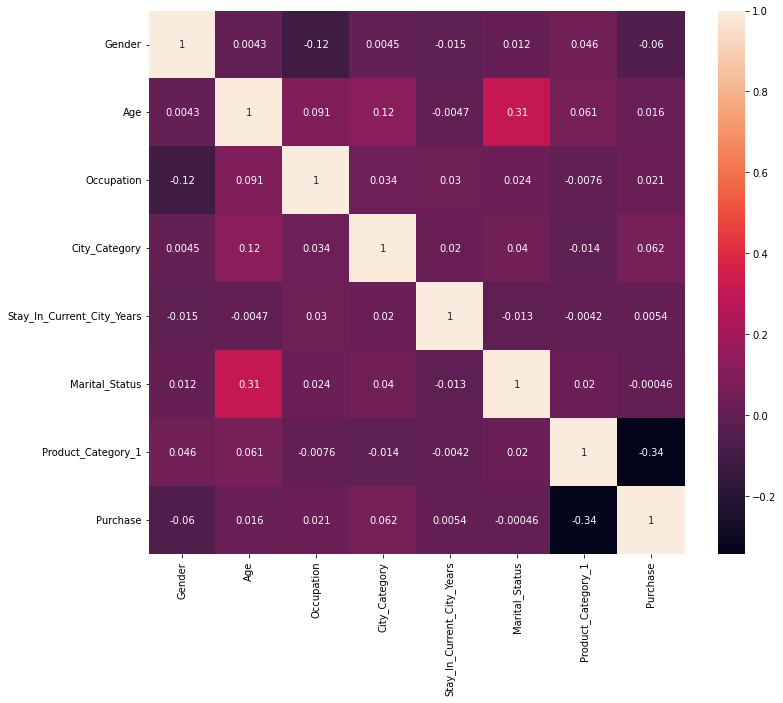

In [103]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [106]:
X = df[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']].values 
y = df['Purchase'].values

In [108]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size = 0.30, random_state = 50)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (385047, 7)
Shape of test_X:  (165021, 7)


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Linear** **Regression**

In [110]:
lr = LinearRegression()
lr.fit(train_X,train_Y)
lr_predict = lr.predict(test_X)

In [114]:
mae_lr = mean_absolute_error(test_Y, lr_predict)
mse_lr = mean_squared_error(test_Y, lr_predict)
r2score_lr = r2_score(test_Y, lr_predict)
print("MAE score of LR model :" , mae_lr)
print("MSE score of LR model :" , mse_lr)
print("r2 score of LR model :" , r2score_lr)

MAE score of LR model : 3603.397411242093
MSE score of LR model : 22188639.443210162
r2 score of LR model : 0.12140766539568992


# **Random** **Forest**

In [115]:
rf = RandomForestRegressor()
rf.fit(train_X, train_Y)
rf_predict = rf.predict(test_X)

In [116]:
mae_rf = mean_absolute_error(test_Y, rf_predict)
mse_rf = mean_squared_error(test_Y, rf_predict)
r2score_rf = r2_score(test_Y, rf_predict)
print("MAE score of Random Forest model :" , mae_rf)
print("MSE score of Random Forest model :" , mse_rf)
print("r2 score of LR model :" , r2score_rf)

MAE score of Random Forest model : 2167.774657318435
MSE score of Random Forest model : 8699393.232760532
r2 score of LR model : 0.6555345256939187
